In [ ]:
!pip install d2l==0.16.1


**Importing required modules**

In [2]:
from d2l import torch as d2l
import torch
from torch import nn

### **The Data loader**

In [ ]:
# this creates the dataloaders for the dataset

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

### **The SoftMax Regression Model**

In [4]:
class SoftMaxRegression(nn.Module):
    def __init__(self):
        super().__init__()
        # define layers
        self.flatten = nn.Flatten()
        self.linear = nn.Linear(784, 10)
                
    def forward(self, x):
        # Now it only takes a call to the layer to make predictions
        y = self.flatten(x)
        y = self.linear(y)
        return y


In [12]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# let's instantiate a model
model = SoftMaxRegression().to(device)

# define loss function
loss_fn = nn.CrossEntropyLoss()
#loss_fn = nn.NLLLoss()

# define optimizer
#optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
optimizer = torch.optim.Adam(model.parameters())

In [6]:
# The model initializer 

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

model.apply(init_weights);

### **Sanity check with variables**

In [7]:
    for x_batch, y_batch in train_iter:
      
      print(x_batch.shape)
      print(y_batch)

      x_batch = x_batch.to(device)
      y_batch = y_batch.to(device)
      
      y_hat = model(x_batch)
            
      ll = loss_fn(y_hat, y_batch )
      print(ll)

      break   # break after first pair, we just want to observe

torch.Size([256, 1, 28, 28])
tensor([6, 6, 8, 2, 5, 5, 3, 2, 6, 7, 8, 9, 7, 1, 3, 3, 9, 6, 5, 2, 0, 4, 6, 2,
        1, 9, 5, 9, 8, 7, 3, 2, 7, 0, 1, 7, 0, 6, 5, 7, 1, 5, 2, 5, 6, 6, 2, 3,
        4, 6, 1, 3, 6, 7, 4, 5, 5, 2, 3, 4, 0, 8, 8, 1, 9, 8, 6, 7, 6, 2, 6, 6,
        7, 5, 1, 8, 3, 6, 9, 6, 1, 2, 3, 7, 3, 5, 0, 7, 0, 0, 3, 9, 9, 8, 2, 9,
        4, 3, 3, 0, 4, 6, 0, 6, 1, 5, 6, 9, 4, 4, 0, 6, 2, 6, 3, 5, 0, 9, 9, 6,
        0, 1, 1, 4, 8, 0, 7, 2, 8, 6, 2, 5, 0, 7, 9, 6, 6, 4, 7, 7, 3, 5, 3, 3,
        7, 5, 1, 6, 7, 6, 2, 7, 0, 7, 2, 7, 7, 0, 3, 8, 4, 7, 2, 1, 3, 3, 6, 7,
        0, 2, 6, 5, 6, 0, 8, 5, 6, 9, 7, 6, 0, 7, 1, 1, 0, 3, 3, 8, 9, 9, 4, 3,
        4, 2, 8, 1, 7, 1, 6, 6, 6, 6, 0, 1, 7, 6, 0, 4, 9, 6, 9, 3, 5, 2, 5, 4,
        0, 7, 3, 0, 7, 8, 2, 8, 1, 8, 2, 2, 3, 8, 8, 4, 2, 3, 6, 4, 8, 7, 3, 7,
        5, 7, 5, 3, 1, 3, 2, 4, 3, 5, 0, 9, 4, 1, 9, 7])
tensor(2.2752, device='cuda:0', grad_fn=<NllLossBackward>)


### **Wrapper for training steps**


In [13]:
def make_train_step(model, loss_fn, optimizer):
    # Builds function that performs a step in the train loop
    def train_step(x, y):
        # Sets model to TRAIN mode
        model.train()
        # Makes predictions
        yhat = model(x)
        # Computes loss
        loss = loss_fn(yhat, y)
        # Computes gradients
        loss.backward()
        # Updates parameters and zeroes gradients
        optimizer.step()
        optimizer.zero_grad()
        # Returns the loss
        return loss.item()
    
    # Returns the function that will be called inside the train loop
    return train_step

# Creates the train_step function for our model, loss function and optimizer
train_step = make_train_step(model, loss_fn, optimizer)
losses = []
n_epochs = 10


Here is how the train_loader can be used to make a training loop for minibatches. The inner loop grabs minibatches from the train loader,
passes to the device where the model is, and just does a training step. It also computes the loss and keeps it around, so we can observe it later. 

### **Training**

\

In [14]:
model.apply(init_weights)   #always good to initialize in the beginning
n_epochs = 10
losses = []
test_losses = []
train_step = make_train_step(model, loss_fn, optimizer)

for epoch in range(n_epochs):
    for x_batch, y_batch in train_iter:
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)

        loss = train_step(x_batch, y_batch)
        losses.append(loss)

    # torch no_grad makes sure that the nested-below computations happen without gradients, 
    # since these are not needed for evaluation
    with torch.no_grad():
        for x_test, y_test in test_iter:
            x_test = x_test.to(device)
            y_test = y_test.to(device)
            
            model.eval()
    
            yhat = model(x_test)
            test_loss = loss_fn(yhat, y_test)
            test_losses.append(test_loss.item())

#print(model.state_dict())

### **Check some predictions**

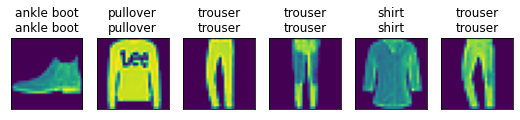

In [15]:
def predict_ch3(net, test_iter, n=6):  #@save
    """Predict labels (defined in Chapter 3)."""
    for X, y in test_iter:
        X = X.to(device)
        y = y.to(device)
        break
    trues = d2l.get_fashion_mnist_labels(y)
    preds = d2l.get_fashion_mnist_labels(model(X).argmax(axis=1))
    titles = [true + '\n' + pred for true, pred in zip(trues, preds)]
    Xcpu = X.cpu()
    d2l.show_images(Xcpu[0:n].reshape((n, 28, 28)), 1, n, titles=titles[0:n])


predict_ch3(model, test_iter)

### **Check Accuracy**

In [16]:
def accuracy(net, test_iter):  #@save
    
    n_samples = 0; 
    n_correct = 0;
    model.eval()
    for X, y in test_iter:
        X = X.to(device)
        y = y.to(device)
        
        trues = y

        preds = model(X).argmax(axis=1)
        

        n_samples = n_samples + y.shape[0]
        n_correct = n_correct + (trues==preds).sum()
        break
    
    return n_correct/n_samples

accuracy(model,test_iter)

tensor(0.8477, device='cuda:0')